In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Для расчета погрешности по умолчанию используем уровень значимости 95%
def MonteCarlo_cos(n, list_x, list_y):
    result = []
    error = []
    for _ in range(n):
        x = np.random.uniform(list_x[0], list_x[1], 1)
        y = np.random.uniform(list_y[0], list_y[1], 1)
        error.append(y)
        if y < np.cos(x):
            result.append(1)
        else:
            result.append(0)
    return np.mean(result) * np.pi, np.std(error)/np.sqrt(n)*1.96

In [3]:
result, error= MonteCarlo_cos(1000, [-(np.pi/2), np.pi/2], [0, 1])
print(f'площадь фигуры : {result}')
print(f'погрешность при {1000} итерациях составляет {round(error*100,2)}%')

площадь фигуры : 2.0326104468725963
погрешность при 1000 итерациях составляет 1.77%


In [4]:
MonteCarlo_cos(1000, [-(np.pi/2), np.pi/2], [0, 1])

(2.0137608909510574, 0.017799017062998176)

In [5]:
sizes = [30, 100, 500, 1000, 5000, 10000, 50000, 100000]
result = []
error = []
for n in tqdm((sizes)):
    result.append(MonteCarlo_cos(n, [-(np.pi/2), np.pi/2], [0, 1])[0])
    error.append(MonteCarlo_cos(n, [-(np.pi/2), np.pi/2], [0, 1])[1])
result

  0%|          | 0/8 [00:00<?, ?it/s]

[2.3038346126325147,
 1.9477874452256718,
 1.9540706305328512,
 2.0074777056438777,
 1.9842299200073135,
 2.008420183439955,
 2.0063467322885855,
 2.000346290320229]

In [6]:
df_cos = pd.Series(sizes).to_frame().rename(columns = { 0 :'iters'})
df_cos['value'] = pd.Series(result).values
df_cos['error'] = pd.Series(error).values
df_cos

,iters,value,error
0,30,2.303835,0.100802
1,100,1.947787,0.056813
2,500,1.954071,0.025547
3,1000,2.007478,0.017433
4,5000,1.984230,0.008044
5,10000,2.008420,0.005679
6,50000,2.006347,0.002536
7,100000,2.000346,0.001790


<AxesSubplot:xlabel='iters'>

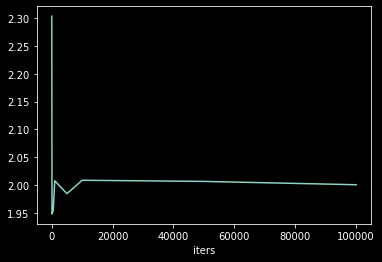

In [7]:
df_cos.set_index('iters')['value'].plot()

<AxesSubplot:xlabel='iters'>

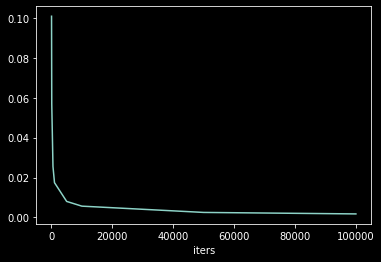

In [8]:
df_cos.set_index('iters')['error'].plot()